##Import Libraries

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

##Data loading

In [ ]:
TRAIN_IMG_FOLDER = '/content/drive/MyDrive/Dataset/TRAIN/'
TEST_IMG_FOLDER = '/content/drive/MyDrive/Dataset/Test/'

train_set_files = os.listdir(TRAIN_IMG_FOLDER)
test_set_files = os.listdir(TEST_IMG_FOLDER)

width  = 92
height = 112

In [ ]:
len(train_set_files)

240

In [ ]:
len(test_set_files)

160

In [ ]:
#Creating Training data Tensor
train_image_names = os.listdir(TRAIN_IMG_FOLDER)
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64) # initialize the tensor

for i in range(len(train_image_names)):
    img = plt.imread(TRAIN_IMG_FOLDER + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten() # update tensor value


##Creating Testing data Tensor
test_image_names = os.listdir(TEST_IMG_FOLDER)
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(TEST_IMG_FOLDER + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()


In [ ]:
print('training_tensor Shape:', training_tensor.shape)

training_tensor Shape: (240, 10304)


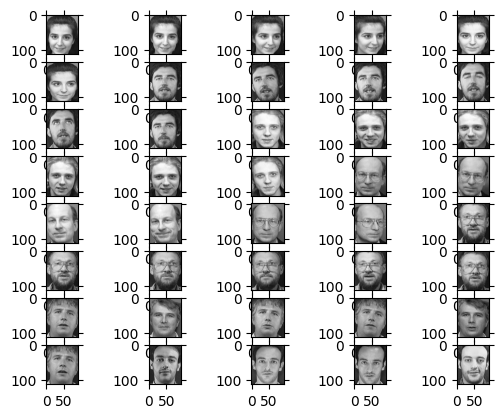

In [ ]:
#visualize first 40 images from training data
for i in range(40):
    img = training_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

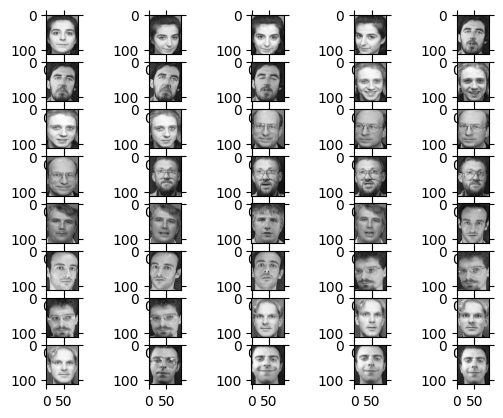

In [ ]:
#visualize first 40 images from test data
for i in range(40):
    img = testing_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Calculate the mean face

The mean is just the sum of all of the pictures divided by the number of pictures. As a result, we will have an “average” face.

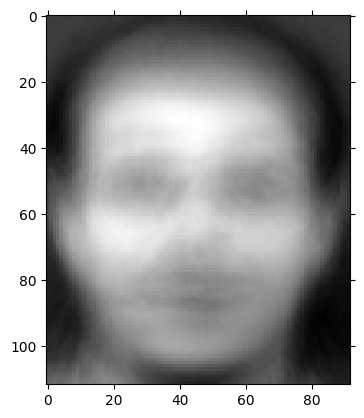

In [ ]:
mean_face = np.zeros((1,height*width)) # intialize zero mean vector

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten() # calculating the mean face vector

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Calculation of difference between training vector and mean vector

To normalize the training set, we just simply need to subtract for each picture in the training set the mean that was calculated in the previous step.

The reason why this is necessary is because we want to create a system that is able to represent any face. Therefore, we calculated the elements that all faces have in common (the mean). If we extract this average from the pictures, the features that distinguish each picture from the rest of the set are visible.

In [ ]:
# Do Mean zero or Normalization
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

In [ ]:
print('normalised_training_tensor Shape:', normalised_training_tensor.shape)

normalised_training_tensor Shape: (240, 10304)


## Display normalised faces

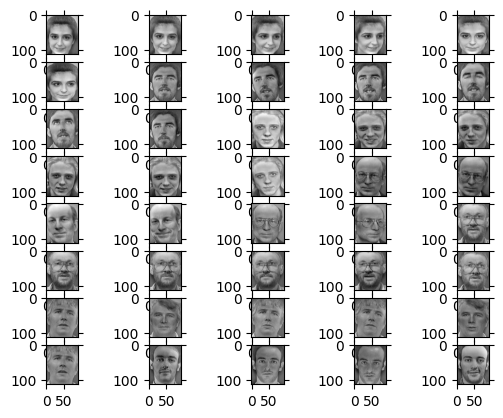

In [ ]:
for i in range(40):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    #plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
trans_normalised_training_tensor = np.transpose(normalised_training_tensor, axes=(1, 0))

In [ ]:
print('trans_training_tensor Shape:', trans_normalised_training_tensor.shape)

trans_training_tensor Shape: (10304, 240)


## Converience Matrix

The covariance represents how two variables change together. After the previous step, we have a set of images that have different features, so now we want to see how these features for each individual picture change in relation to the rest of the pictures.

In [ ]:
cov_matrix=np.cov(trans_normalised_training_tensor)
print('Covariance Matrix Shape:', cov_matrix.shape)
cov_matrix = np.divide(cov_matrix,10304.0)

Covariance Matrix Shape: (10304, 10304)


## Eigenvector of covariance

From the covariance we can extract the eigenvectors. Fortunately, there is a function that helps us in this step. There is plenty of information in the internet about eigenvectors but the general idea is that eigenvectors are the vectors of the covariance that describe the direction of the data.

In [ ]:
#eigenvalues and eigenvectors
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('eigenvalues.shape: {} eigenvectors.shape: {}'.format(eigenvalues.shape, eigenvectors.shape))

eigenvalues.shape: (10304,) eigenvectors.shape: (10304, 10304)


In [ ]:
# sorting the eigen values

sorted_ind = sorted(range(eigenvalues.shape[0]), key=lambda k: eigenvalues[k], reverse=True)
eigvalues_sort = eigenvalues[sorted_ind]
eigvectors_sort = eigenvectors[sorted_ind]


## Find cumulative variance of each principle component

Cumulative proportion of variance explained vector: 
[0.183537  +0.j 0.31163576+0.j 0.38249275+0.j ... 1.        +0.j
 1.        +0.j 1.        +0.j]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


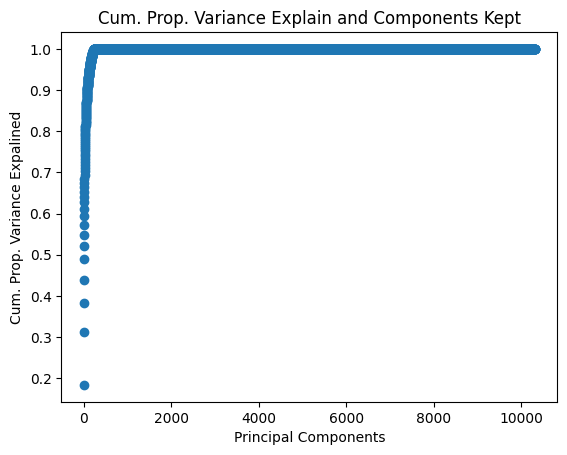

In [ ]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the necessary of principal components:

In [ ]:
# choose 200 principle components
reduced_data = np.array(eigvectors_sort[:200]).transpose()
reduced_data.shape

(10304, 200)

In [ ]:
print(training_tensor.shape, reduced_data.shape)

(240, 10304) (10304, 50)


##  eigenfaces

In [ ]:
trans_reduced_data = np.transpose(reduced_data, axes=(1, 0))

## Plot eigen faces

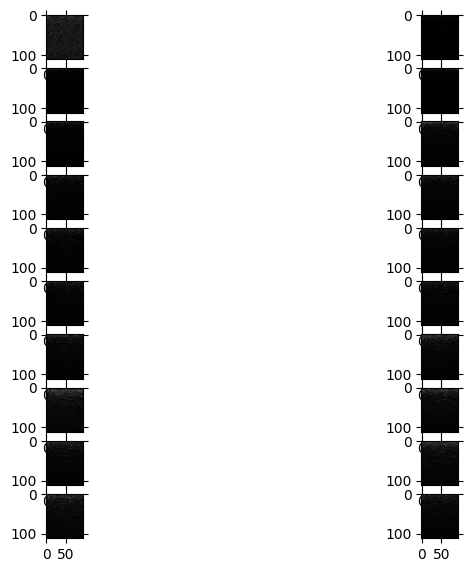

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming proj_data is your complex data
for i in range(20):
    # Convert complex data to magnitude
    img = np.abs(trans_reduced_data[i].reshape(height, width))

    plt.subplot(10, 2, 1 + i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming proj_data is your complex data
for i in range(1):
    # Convert complex data to magnitude
    img = np.abs(trans_reduced_data[i].reshape(height, width))

img

array([[0.00429816, 0.01438103, 0.02014416, ..., 0.00385494, 0.00097234,
        0.00715693],
       [0.00113916, 0.00288805, 0.00232031, ..., 0.00197771, 0.0008885 ,
        0.00422776],
       [0.00337941, 0.00757447, 0.00539961, ..., 0.0040051 , 0.0040051 ,
        0.0015554 ],
       ...,
       [0.00201693, 0.00201693, 0.00177431, ..., 0.00141667, 0.00087593,
        0.00087593],
       [0.00129876, 0.00060586, 0.00060586, ..., 0.00269195, 0.00215368,
        0.00215368],
       [0.0045167 , 0.0045167 , 0.00308793, ..., 0.00098548, 0.00134539,
        0.00199787]])

## Finding weights for each traning image

Each normalized face in the training set multiplies each eigenface. Consequently, there will be N set of weights with M elements (N = amount of pictures in the training set, M = number of eigenfaces).

In [ ]:
# Signature for each face
w = np.array([np.dot(trans_reduced_data,i) for i in normalised_training_tensor])
print(w.shape)

(240, 200)


## Reconizing all test images

In [ ]:
def recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=False):

    count        = 0
    num_images   = 0
    correct_pred = 0

    result = []
    wts = []

    #False match rate (FMR)
    FMR_count = 0

    #False non-match rate (FNMR)
    FNMR_count = 0


    test_image_names2 = sorted(test_image_names)

    for img in test_image_names2:

        unknown_face = plt.imread(TEST_IMG_FOLDER+img)
        num_images += 1

        unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
        normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)

        wts.append([count, norms[index]])

        if prn: print('Input:'+'.'.join(img.split('.')[:2]), end='\t')
        count+=1

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        if norms[index] < t0: # It's a face
            if match:
                if prn: print('Matched:' + train_image_names[index], end = '\t')
                correct_pred += 1
                result.append(1)
            else:
                if prn: print('F/Matched:'+train_image_names[index], end = '\t')
                result.append(0)
                FMR_count += 1
        else:
            if match:
                if prn: print('Unknown face!'+train_image_names[index], end = '\t')
                FNMR_count +=1

            else:
                pass
                correct_pred += 1



        if prn: print(norms[index], end=' ')
        if prn: print()



    FMR = FMR_count/num_images
    FNMR = FNMR_count/num_images


    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred/num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))



    return wts, result, correct_pred, num_images, FMR, FNMR


wts, result, correct_pred, num_images, FMR, FNMR =recogniser(test_image_names, train_image_names,trans_reduced_data,w, t0=2e8, prn=True)

Input:s10_10.pgm	F/Matched:s9_4.pgm	361.0698348146169 
Input:s10_7.pgm	Matched:s10_6.pgm	279.8684232967317 
Input:s10_8.pgm	Matched:s10_2.pgm	243.8960037739844 
Input:s10_9.pgm	Matched:s10_5.pgm	391.0859778321614 
Input:s11_10.pgm	Matched:s11_1.pgm	281.3650100458619 
Input:s11_7.pgm	Matched:s11_1.pgm	348.4863041923308 
Input:s11_8.pgm	F/Matched:s27_6.pgm	419.4913112141066 
Input:s11_9.pgm	Matched:s11_4.pgm	383.7045841725243 
Input:s12_10.pgm	Matched:s12_5.pgm	286.5873548968995 
Input:s12_7.pgm	Matched:s12_2.pgm	233.79706722215704 
Input:s12_8.pgm	Matched:s12_1.pgm	258.20170376967974 
Input:s12_9.pgm	Matched:s12_5.pgm	293.970847115064 
Input:s13_10.pgm	Matched:s13_5.pgm	189.89369138096137 
Input:s13_7.pgm	Matched:s13_5.pgm	285.12676063826433 
Input:s13_8.pgm	Matched:s13_5.pgm	277.2827589792681 
Input:s13_9.pgm	Matched:s13_6.pgm	292.5245280615731 
Input:s14_10.pgm	Matched:s14_6.pgm	334.8378854393804 
Input:s14_7.pgm	Matched:s14_6.pgm	335.63437790264624 
Input:s14_8.pgm	Matched:s14_6.pgm	

## Visualization of prediction result on all test images

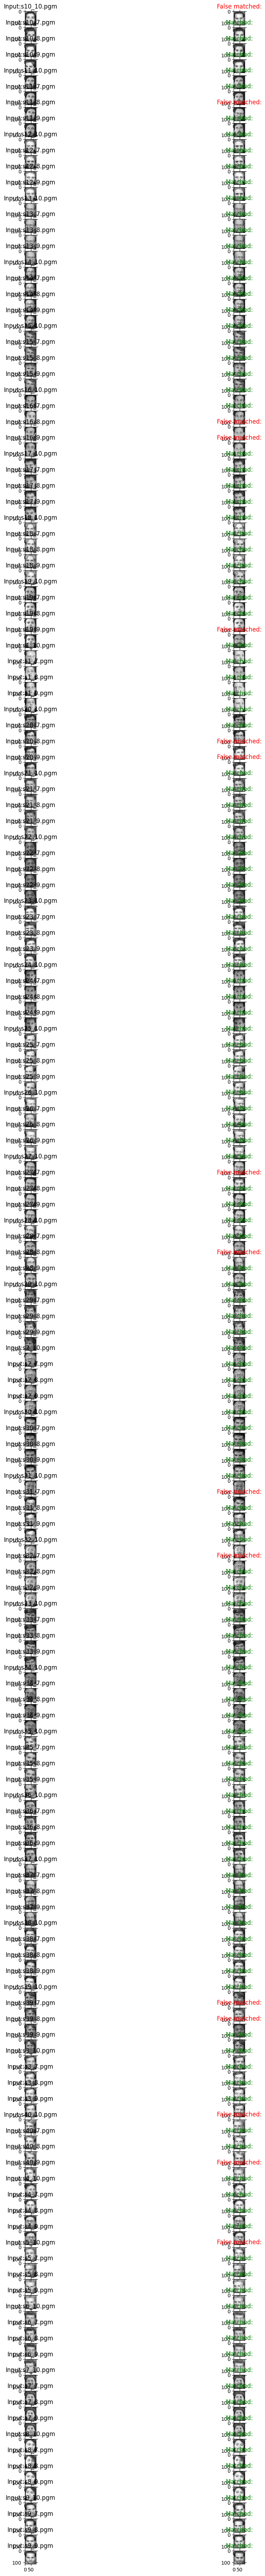

In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def Visualization(img, train_image_names,trans_reduced_data,w, t0):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(TEST_IMG_FOLDER+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

    plt.subplot(160,2,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    w_unknown = np.dot(trans_reduced_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)




    plt.subplot(160,2,1+count)
    if norms[index] < t0: # It's a face

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        #if img.split('.')[0] == train_image_names[index].split('.')[0]:
        if match:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.title('Matched:', color='g')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')

            correct_pred += 1
        else:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.title('False matched:', color='r')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')
    else:
        #if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
        if img.split('_')[0] not in [i.split('_')[0] for i in train_image_names]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)

    count+=1


fig = plt.figure(figsize=(10, 30))

test_image_names2 = sorted(test_image_names)
for i in range(len(test_image_names2)):
    Visualization(test_image_names2[i], train_image_names,trans_reduced_data,w, t0=2.7e7)

plt.show()